# Load Basic Packages

In [1]:
import os
import numpy as np
import pandas  as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


import nltk
from nltk import corpus,tokenize
from nltk.corpus import stopwords

import re
import string

from nltk.stem import PorterStemmer,WordNetLemmatizer,porter
from wordcloud import WordCloud, STOPWORDS


from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.model_selection import train_test_split

# ML

from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

import warnings
warnings.filterwarnings('ignore')


In [2]:
!pip install wordcloud

In [3]:
hotstar = pd.read_csv("hotstar_reviews.csv")
hotstar

,ID,UserName,Created_Date,Reviews,Lower_Case_Reviews,Sentiment_Manual_BP,Sentiment_Manual,Review_Length,DataSource,Year,Month,Date,Sentiment_Polarity
0,1,NaN,08-10-2017,Hh,hh,Negative,Negative,2,Google_PlayStore,2017,8,10,Neutral
1,2,NaN,08-11-2017,No,no,Negative,Negative,2,Google_PlayStore,2017,8,11,Neutral
2,3,asadynwa,08-12-2017,@hotstar_helps during paymnt for premium subsc...,@hotstar_helps during paymnt for premium subsc...,Help,Negative,140,Twitter,2017,8,12,Negative
3,4,jineshroxx,08-11-2017,@hotstartweets I am currently on Jio network a...,@hotstartweets i am currently on jio network a...,Help,Negative,140,Twitter,2017,8,11,Positive
4,5,YaminiSachar,08-05-2017,@hotstartweets the episodes of Sarabhai vs Sar...,@hotstartweets the episodes of sarabhai vs sar...,Help,Negative,140,Twitter,2017,8,5,Neutral
...,...,...,...,...,...,...,...,...,...,...,...,...,...
5048,5049,Sushena Sharma,08-12-2017,I LOATHE this application in so many levels Fo...,i loathe this application in so many levels fo...,Negative,Negative,423,Google_PlayStore,2017,8,12,Negative
5049,5050,Nishit Patel,08-11-2017,1 Cannot keep track of progress If you watch v...,1 cannot keep track of progress if you watch v...,Negative,Negative,479,Google_PlayStore,2017,8,11,Neutral
5050,5051,Veeraraagavan Rajachandrasekhar,08-09-2017,1 Miles below experience like Amazon prime 2 E...,1 miles below experience like amazon prime 2 e...,Negative,Negative,543,Google_PlayStore,2017,8,9,Neutral
5051,5052,Rohan Deshmane,08-10-2017,You pay for premium your internet speed is at ...,you pay for premium your internet speed is at ...,Negative,Negative,565,Google_PlayStore,2017,8,10,Positive


In [4]:
hotstar.shape

(5053, 13)

In [5]:
hotstar.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5053 entries, 0 to 5052
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   ID                   5053 non-null   int64 
 1   UserName             4331 non-null   object
 2   Created_Date         5053 non-null   object
 3   Reviews              5053 non-null   object
 4   Lower_Case_Reviews   5053 non-null   object
 5   Sentiment_Manual_BP  5053 non-null   object
 6   Sentiment_Manual     5053 non-null   object
 7   Review_Length        5053 non-null   int64 
 8   DataSource           5053 non-null   object
 9   Year                 5053 non-null   int64 
 10  Month                5053 non-null   int64 
 11  Date                 5053 non-null   int64 
 12  Sentiment_Polarity   5053 non-null   object
dtypes: int64(5), object(8)
memory usage: 513.3+ KB


In [6]:
hotstar.Sentiment_Manual.value_counts()/len(hotstar.Sentiment_Manual)*100

Neutral     34.395409
Positive    34.296458
Negative    31.308134
Name: Sentiment_Manual, dtype: float64

In [7]:
hotstar.DataSource.value_counts()/hotstar.DataSource.size*100

Twitter             55.927172
Google_PlayStore    44.072828
Name: DataSource, dtype: float64

In [8]:
pd.pivot_table(hotstar,index='Sentiment_Manual',columns ='DataSource',values='ID',aggfunc='count')/hotstar.DataSource.size*100

DataSource,Google_PlayStore,Twitter
Sentiment_Manual,,
Negative,12.923016,18.385118
Neutral,5.125668,29.269741
Positive,26.024144,8.272313


# Data Cleaning

### Reviews and lower case reviews are same so we will consider one with lower case as we anyways have to convert into lower as pyton is case sensitve language and it would consider same word as different if not converted to lower

In [9]:
hotstar.columns

Index(['ID', 'UserName', 'Created_Date', 'Reviews', 'Lower_Case_Reviews',
       'Sentiment_Manual_BP', 'Sentiment_Manual', 'Review_Length',
       'DataSource', 'Year', 'Month', 'Date', 'Sentiment_Polarity'],
      dtype='object')

In [10]:
review_data = hotstar[['Lower_Case_Reviews','DataSource','Sentiment_Manual']]
review_data.head()

,Lower_Case_Reviews,DataSource,Sentiment_Manual
0,hh,Google_PlayStore,Negative
1,no,Google_PlayStore,Negative
2,@hotstar_helps during paymnt for premium subsc...,Twitter,Negative
3,@hotstartweets i am currently on jio network a...,Twitter,Negative
4,@hotstartweets the episodes of sarabhai vs sar...,Twitter,Negative


In [11]:
review_data.columns=['Reviews','Source','Manual']
review_data.head()

,Reviews,Source,Manual
0,hh,Google_PlayStore,Negative
1,no,Google_PlayStore,Negative
2,@hotstar_helps during paymnt for premium subsc...,Twitter,Negative
3,@hotstartweets i am currently on jio network a...,Twitter,Negative
4,@hotstartweets the episodes of sarabhai vs sar...,Twitter,Negative


In [12]:
review_data.describe(include = 'object')

,Reviews,Source,Manual
count,5053,5053,5053
unique,5053,2,3
top,hh,Twitter,Neutral
freq,1,2826,1738


In [13]:
review_data.Source.value_counts()

Twitter             2826
Google_PlayStore    2227
Name: Source, dtype: int64

In [14]:
review_data['Source']= review_data['Source'].astype('category')
review_data['Source']= review_data['Source'].cat.codes
review_data['Source'].value_counts()


1    2826
0    2227
Name: Source, dtype: int64

In [15]:
review_data.head()

,Reviews,Source,Manual
0,hh,0,Negative
1,no,0,Negative
2,@hotstar_helps during paymnt for premium subsc...,1,Negative
3,@hotstartweets i am currently on jio network a...,1,Negative
4,@hotstartweets the episodes of sarabhai vs sar...,1,Negative


In [16]:
punctuation= list(string.punctuation)
stop_words = stopwords.words('english')
re_pattern = '''@[a-zA-Z0-9_:]+|b['"]rt|[\d]+[a-zA-Z_+='?]+[\d]+[\d]+|[a-zA-Z_*+=]+[\d]+[a-zA-Z_*+-=]+|[\d]+'''

re_pattern=re_pattern +"""|https:+[a-zA-Z0-9/._+-=]+|&amp;|rt"""

reviewText= [re.sub(pattern= re_pattern,string= text, repl='') for text in review_data.Reviews.map(str).values]

In [17]:
re_pattern

'@[a-zA-Z0-9_:]+|b[\'"]rt|[\\d]+[a-zA-Z_+=\'?]+[\\d]+[\\d]+|[a-zA-Z_*+=]+[\\d]+[a-zA-Z_*+-=]+|[\\d]+|https:+[a-zA-Z0-9/._+-=]+|&amp;|rt'

In [18]:
print(reviewText[7])

 why today s epi of #lovekahaiintezaar nt available on available now it was in d morning now showing nt available due expiry


In [19]:
review_data_cleaned=[]

for review in reviewText:
    stop_free = " ".join([txt for txt in review.lower().split()if txt not in stop_words])
    # stop words nltk
    stop_free_1= " ".join([txt for txt in stop_free.lower().split()if txt not in STOPWORDS])
    # Stop words - wordcloud
    puct_free=" ".join([txt for txt in stop_free_1.lower().split() if txt not in punctuation])
    review_data_cleaned.append(puct_free)

In [20]:
corpus = []
for i in range(len(review_data_cleaned)):
    review = re.sub('[^a-zA-Z]',' ',review_data_cleaned[i])
    review = "".join(review)
    corpus.append(review)

In [21]:
corpus[57]

'need buy rs premier league pack compulsory watch pl matches already premium pack activated'

In [22]:
# Lemmatization

wd = WordNetLemmatizer()

review_data_cleaned_final_output = []

for rdc in corpus:
    clean_review=" ".join(wd.lemmatize(word) for word in rdc.split())
    review_data_cleaned_final_output.append(clean_review)

In [23]:
review_data['clean_review']=review_data_cleaned_final_output

In [24]:
review_data.head()

,Reviews,Source,Manual,clean_review
0,hh,0,Negative,hh
1,no,0,Negative,
2,@hotstar_helps during paymnt for premium subsc...,1,Negative,paymnt premium subscription transaction failed...
3,@hotstartweets i am currently on jio network a...,1,Negative,currently jio network know whether able watch ...
4,@hotstartweets the episodes of sarabhai vs sar...,1,Negative,episode sarabhai v sarabhai season downloadabl...


In [25]:
# Split the data in train and test split

In [26]:
x_train,x_test,y_train,y_test=train_test_split(review_data['clean_review'],review_data['Manual'],test_size=0.2,random_state=42,stratify=review_data['Manual'])

In [27]:
print(x_test.shape,x_test.shape,y_train.shape,y_test.shape)

(1011,) (1011,) (4042,) (1011,)


# FEATURE EXTRACTION - BOW

In [28]:
vectorizer = CountVectorizer(binary = True).fit(x_train)
x_train_vectorized = vectorizer.transform(x_train)
x_test_vectorized = vectorizer.transform(x_test)

In [29]:
print(vectorizer.get_feature_names())

['aa', 'aaaaaand', 'aaaaah', 'aab', 'aadat', 'aadhaar', 'aadhaarmemes', 'aage', 'aaj', 'aajata', 'aalaporaantamizhan', 'aap', 'aapka', 'aapke', 'aaps', 'aarambh', 'aasha', 'aata', 'aate', 'aaya', 'ab', 'abb', 'abdul', 'abe', 'abeer', 'abeergiri', 'abhay', 'abhi', 'abki', 'able', 'abong', 'abruptly', 'absolute', 'absolutely', 'absorbs', 'abt', 'abusive', 'acc', 'accent', 'accepts', 'access', 'accessible', 'acch', 'accha', 'accidentally', 'accnt', 'according', 'account', 'acha', 'achha', 'achi', 'achoda', 'across', 'act', 'acted', 'acting', 'actio', 'action', 'activated', 'activity', 'actor', 'actress', 'actual', 'actually', 'ad', 'ada', 'add', 'adddds', 'added', 'addicted', 'addictionproblems', 'adding', 'address', 'addressed', 'addressing', 'adi', 'adiripovali', 'adni', 'adona', 'adorable', 'adult', 'adv', 'advance', 'advanced', 'advantage', 'advay', 'advaysinghraizada', 'adve', 'adveised', 'adveisement', 'adveisements', 'adveisers', 'adveising', 'advent', 'adventurous', 'adves', 'ae',

In [30]:
pd.DataFrame(x_train_vectorized.toarray())

,0,1,2,3,4,5,6,7,8,9,...,4964,4965,4966,4967,4968,4969,4970,4971,4972,4973
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4037,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4038,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4039,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4040,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [31]:
naive_bayes = MultinomialNB().fit(x_train_vectorized, y_train)

In [32]:
print(naive_bayes.score(x_train_vectorized,y_train))
print(naive_bayes.score(x_test_vectorized,y_test))

0.8800098960910441
0.7151335311572701


In [33]:
predict_train = naive_bayes.predict(x_train_vectorized)
predict_test = naive_bayes.predict(x_test_vectorized)

In [34]:
predict_train

array(['Positive', 'Negative', 'Neutral', ..., 'Negative', 'Negative',
       'Negative'], dtype='<U8')

In [35]:
predict_test

array(['Negative', 'Positive', 'Positive', ..., 'Neutral', 'Neutral',
       'Neutral'], dtype='<U8')

In [36]:
def get_num(data):
    data_new = pd.DataFrame(data,columns=['Manual'])
    data_new['Y_label']= np.where(data_new['Manual']=='Neutral',0,np.where(data_new['Manual']=='Positive',1,2))
    return data_new

In [37]:
y_train_new= get_num(y_train)
y_test_new=get_num(y_test)
predict_train_new = get_num(predict_train)
predict_test_new=get_num(predict_test)

In [38]:
y_test_new

,Manual,Y_label
2168,Neutral,0
2357,Neutral,0
4286,Positive,1
1856,Neutral,0
152,Negative,2
...,...,...
1580,Neutral,0
3280,Positive,1
386,Neutral,0
1468,Neutral,0


In [39]:
print(classification_report(y_train_new['Y_label'],predict_train_new['Y_label']))

print()

print(classification_report(y_test_new['Y_label'],predict_test_new['Y_label']))

              precision    recall  f1-score   support

           0       0.91      0.82      0.86      1390
           1       0.90      0.91      0.91      1386
           2       0.83      0.91      0.87      1266

    accuracy                           0.88      4042
   macro avg       0.88      0.88      0.88      4042
weighted avg       0.88      0.88      0.88      4042


              precision    recall  f1-score   support

           0       0.68      0.66      0.67       348
           1       0.80      0.73      0.77       347
           2       0.68      0.76      0.72       316

    accuracy                           0.72      1011
   macro avg       0.72      0.72      0.72      1011
weighted avg       0.72      0.72      0.72      1011



# Random Forest
- random Forest as there is high variance in above model

In [40]:
rf_model=RandomForestClassifier().fit(x_train_vectorized,y_train)

In [41]:
print(rf_model.score(x_train_vectorized,y_train))
print(rf_model.score(x_test_vectorized,y_test))

0.9903513112320633
0.7012858555885262


In [42]:
predict_train_rf = rf_model.predict(x_train_vectorized)
predict_test_rf = rf_model.predict(x_test_vectorized)

In [43]:
def get_num(data):
    data_new = pd.DataFrame(data,columns=['Manual'])
    data_new['Y_label']= np.where(data_new['Manual']=='Neutral',0,np.where(data_new['Manual']=='Positive',1,2))
    return data_new

In [44]:
y_train_new1= get_num(y_train)
y_test_new1=get_num(y_test)
predict_train_new_rf = get_num(predict_train_rf)
predict_test_new_rf=get_num(predict_test_rf)

In [45]:
print(classification_report(y_train_new1['Y_label'],predict_train_new_rf['Y_label']))

print()

print(classification_report(y_test_new1['Y_label'],predict_test_new_rf['Y_label']))

              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1390
           1       0.99      0.99      0.99      1386
           2       1.00      0.99      0.99      1266

    accuracy                           0.99      4042
   macro avg       0.99      0.99      0.99      4042
weighted avg       0.99      0.99      0.99      4042


              precision    recall  f1-score   support

           0       0.67      0.70      0.68       348
           1       0.74      0.74      0.74       347
           2       0.70      0.66      0.68       316

    accuracy                           0.70      1011
   macro avg       0.70      0.70      0.70      1011
weighted avg       0.70      0.70      0.70      1011



# Apply K Fold Method

In [46]:
from sklearn.model_selection import cross_val_score

train_acc = cross_val_score(rf_model,x_train_vectorized,y_train,cv=10)
print(train_acc.mean())

0.7392390905757242


# XG Boost Classifier

In [47]:
def get_num(data):
    data_new = pd.DataFrame(data,columns=['Manual'])
    data_new['Y_label']= np.where(data_new['Manual']=='Neutral',0,np.where(data_new['Manual']=='Positive',1,2))
    return data_new

In [48]:
y_train_new_xg= get_num(y_train)
y_test_new_xg=get_num(y_test)

In [49]:
y_train_new_xg

,Manual,Y_label
2669,Positive,1
4312,Negative,2
2512,Neutral,0
2722,Positive,1
3254,Positive,1
...,...,...
350,Negative,2
4952,Positive,1
958,Negative,2
67,Negative,2


In [50]:
xgboost= XGBClassifier().fit(x_train_vectorized,y_train_new_xg['Y_label'])

In [51]:
print(xgboost.score(x_train_vectorized,y_train_new_xg['Y_label']))
print(xgboost.score(x_test_vectorized,y_test_new_xg['Y_label']))

0.8433943592281049
0.7200791295746786


# Cross Validation

In [52]:
from sklearn.model_selection import cross_val_score

train_acc = cross_val_score(xgboost,x_train_vectorized,y_train_new_xg['Y_label'],cv=10)
print(train_acc.mean())

0.7372576702114656


# Feature Extraction - TFIDF

In [53]:
tfidf = TfidfVectorizer().fit(x_train)
x_train_tfidf = tfidf.transform(x_train)
x_test_tfidf = tfidf.transform(x_test)

In [54]:
xgboost= XGBClassifier().fit(x_train_tfidf,y_train_new_xg['Y_label'])

In [55]:
print(xgboost.score(x_train_tfidf,y_train_new_xg['Y_label']))
print(xgboost.score(x_test_tfidf,y_test_new_xg['Y_label']))

0.8849579416130628
0.7101879327398615


In [56]:
# BOW is working better than TFIDF

# Word Cloud Analysis

In [57]:
review_data.sample(5)

,Reviews,Source,Manual,clean_review
3102,i love hotstar,0,Positive,love hotstar
4639,@hotstartweets not minutes before america days...,1,Positive,minute america day america gameofthrones leak
531,suraj kumar raj,0,Neutral,suraj kumar raj
4464,hey @hotstartweets is it still hours before to...,1,Positive,hey still hour torrent
4377,nice app but it stucks in between also when th...,0,Positive,nice app stucks g


In [58]:
postive_review = review_data[review_data['Manual']=='Positive']['clean_review']
neg_review = review_data[review_data['Manual']=='Negative']['clean_review']
Neutral_review = review_data[review_data['Manual']=='Neutral']['clean_review']

In [59]:
postive_review.shape,neg_review.shape

((1733,), (1582,))

In [60]:
pos_data_token = [nltk.word_tokenize(rvw) for rvw in postive_review]
neg_data_token = [nltk.word_tokenize(rvw) for rvw in neg_review]
neu_data_token = [nltk.word_tokenize(rvw) for rvw in Neutral_review]

In [61]:
pos_data_token

[['g'],
 ['gd'],
 ['nc'],
 ['nk'],
 ['ty'],
 ['gud'],
 ['nic'],
 ['nyc'],
 ['osm'],
 ['spr'],
 ['sup'],
 ['top'],
 ['wow'],
 ['awsm'],
 ['best'],
 ['cool'],
 ['good'],
 ['iove'],
 [],
 ['love'],
 ['lovw'],
 ['mast'],
 ['maxt'],
 ['nice'],
 ['nyco'],
 ['osam'],
 ['sexy'],
 ['show'],
 ['sprb'],
 ['star'],
 ['thnx'],
 ['vosm'],
 ['woow'],
 ['woww'],
 ['awsam'],
 ['faadu'],
 ['gd', 'gd'],
 ['good'],
 ['grate'],
 ['great'],
 ['happy'],
 ['liked'],
 ['loved'],
 ['lovet'],
 ['lv'],
 ['ossam'],
 ['ossom'],
 ['ousam'],
 ['owsom'],
 ['spicy'],
 ['supar'],
 ['super'],
 ['supet'],
 ['suprb'],
 ['wowed'],
 ['wowww'],
 ['avsome'],
 ['awesum'],
 ['awsome'],
 ['beauti'],
 ['good'],
 ['good', 'g'],
 ['good'],
 [],
 ['love'],
 ['jhakas'],
 ['killer'],
 ['llllll'],
 ['love', 'u'],
 ['lovely'],
 ['luv'],
 ['master'],
 ['fav'],
 ['nc', 'app'],
 ['niceee'],
 ['nicely'],
 ['nyc', 'ap'],
 ['nycccc'],
 ['suparb'],
 ['superb'],
 ['superr'],
 ['supper'],
 ['useful'],
 ['v', 'good'],
 ['v', 'nice'],
 ['zakaas'],


In [62]:
wordcloud_pos = WordCloud(background_color='blue',max_words = 200,max_font_size = 40,scale= 3,random_state= 10).generate(str(pos_data_token))

In [63]:
wordcloud_neg = WordCloud(background_color='white',max_words = 200,max_font_size = 40,scale= 3,random_state= 10).generate(str(neg_data_token))

In [64]:
wordcloud_neu = WordCloud(background_color='black',max_words = 200,max_font_size = 40,scale= 3,random_state= 10).generate(str(neu_data_token))

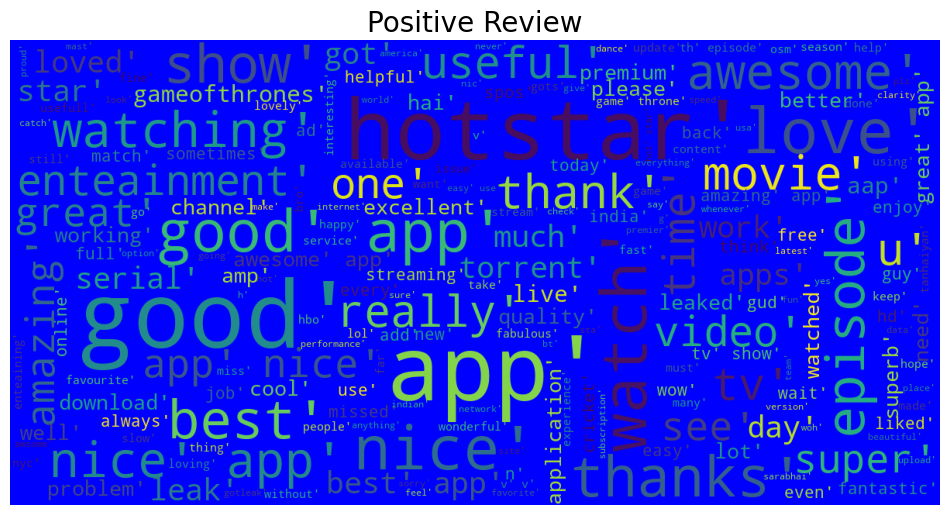

In [65]:
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(12,12))
plt.axis('off')
plt.imshow(wordcloud_pos)
plt.title("Positive Review",size =20 )
plt.show()

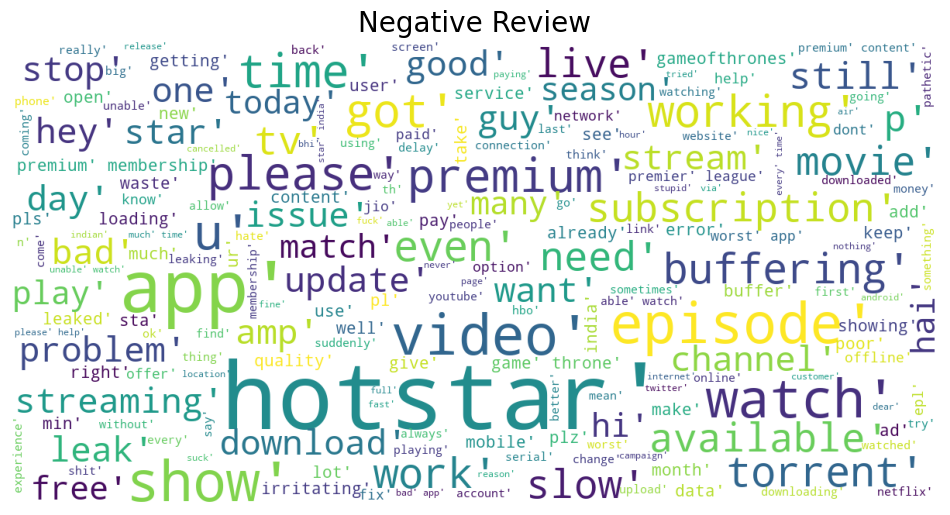

In [66]:
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(12,12))
plt.axis('off')
plt.imshow(wordcloud_neg)
plt.title("Negative Review",size =20 )
plt.show()

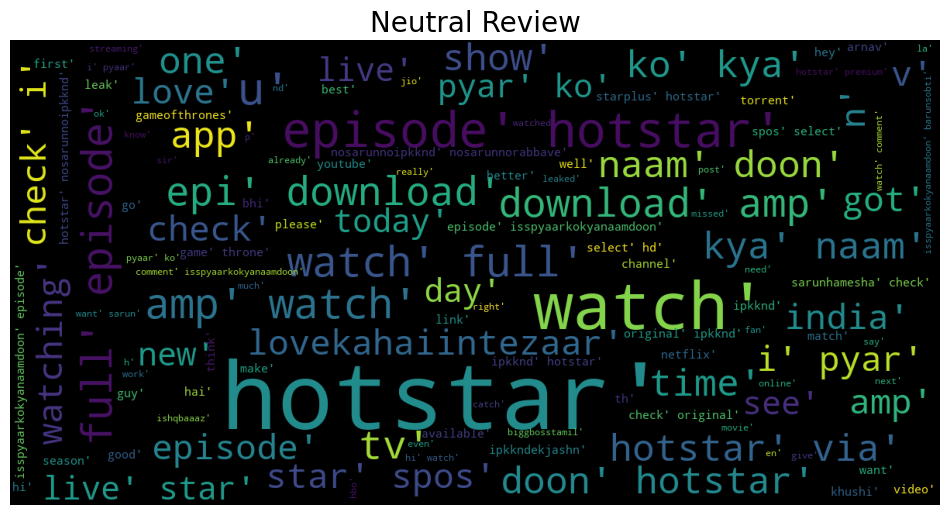

In [67]:
import matplotlib.pyplot as plt
fig=plt.figure(1,figsize=(12,12))
plt.axis('off')
plt.imshow(wordcloud_neu)
plt.title("Neutral Review",size =20 )
plt.show()

# Deep Neural Network

In [76]:
review_data.head()

,Reviews,Source,Manual,clean_review
0,hh,0,Negative,hh
1,no,0,Negative,
2,@hotstar_helps during paymnt for premium subsc...,1,Negative,paymnt premium subscription transaction failed...
3,@hotstartweets i am currently on jio network a...,1,Negative,currently jio network know whether able watch ...
4,@hotstartweets the episodes of sarabhai vs sar...,1,Negative,episode sarabhai v sarabhai season downloadabl...


In [77]:
review_data1 = review_data[['clean_review',"Manual"]]

In [78]:
review_data1.head()

,clean_review,Manual
0,hh,Negative
1,,Negative
2,paymnt premium subscription transaction failed...,Negative
3,currently jio network know whether able watch ...,Negative
4,episode sarabhai v sarabhai season downloadabl...,Negative


In [80]:
review_data1["Manual"]=review_data1["Manual"].astype('category')
review_data1["Manual"] = review_data1["Manual"].cat.codes
review_data1["Manual"].value_counts()

1    1738
2    1733
0    1582
Name: Manual, dtype: int64

In [81]:
review_data1.head()

,clean_review,Manual
0,hh,0
1,,0
2,paymnt premium subscription transaction failed...,0
3,currently jio network know whether able watch ...,0
4,episode sarabhai v sarabhai season downloadabl...,0


In [82]:
x= review_data1['clean_review']
y = review_data1["Manual"]

In [83]:
x.head()

0                                                   hh
1                                                     
2    paymnt premium subscription transaction failed...
3    currently jio network know whether able watch ...
4    episode sarabhai v sarabhai season downloadabl...
Name: clean_review, dtype: object

In [101]:
x_vec1 = pd.DataFrame(x_vec)

In [87]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [89]:
x_train

2669                                             good aap
4312    suddenly stas buffering n buffering n bufferin...
2512    watch bengaluru bull v telugu titan live star ...
2722                                             osam app
3254                                             easy use
                              ...                        
350                                           app working
4952    glad waited watched latest gameofthrones episo...
958     called live feed exact second delayed transmis...
67      order id premium membership cancelled free tra...
749     use image promotional tweet understand spoiler...
Name: clean_review, Length: 4042, dtype: object

In [93]:
x_train_vectorized

<1011x4974 sparse matrix of type '<class 'numpy.int64'>'
	with 5532 stored elements in Compressed Sparse Row format>

In [71]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras import Sequential

In [72]:
x_train = pd.DataFrame(x_train_vectorized.toarray())
x_test = pd.DataFrame(x_test_vectorized.toarray())

In [96]:
x_train_vectorized

<1011x4974 sparse matrix of type '<class 'numpy.int64'>'
	with 5532 stored elements in Compressed Sparse Row format>

In [104]:
x_vec1.shape, y.shape

((5053, 5600), (5053,))

In [106]:
model = Sequential()
model.add(Dense(64,activation = 'relu',input_dim= 5600))
model.add(Dense(8,activation = 'relu'))
model.add(Dense(3,activation = 'softmax'))
model.compile(optimizer='adam',loss= keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])
model.fit(x_vec1,y,epochs=100,batch_size=32,validation_split=0.2)

Epoch 1/100
127/127 [==============================] - 5s 25ms/step - loss: 0.9004 - accuracy: 0.5203 - val_loss: 1.4481 - val_accuracy: 0.2987
Epoch 2/100
127/127 [==============================] - 3s 20ms/step - loss: 0.5584 - accuracy: 0.7939 - val_loss: 1.8108 - val_accuracy: 0.4560
Epoch 3/100
127/127 [==============================] - 2s 19ms/step - loss: 0.3494 - accuracy: 0.9216 - val_loss: 1.9901 - val_accuracy: 0.5054
Epoch 4/100
127/127 [==============================] - 3s 20ms/step - loss: 0.2233 - accuracy: 0.9433 - val_loss: 2.1735 - val_accuracy: 0.5401
Epoch 5/100
127/127 [==============================] - 3s 20ms/step - loss: 0.1596 - accuracy: 0.9557 - val_loss: 2.3999 - val_accuracy: 0.5430
Epoch 6/100
127/127 [==============================] - 3s 21ms/step - loss: 0.1262 - accuracy: 0.9634 - val_loss: 2.7003 - val_accuracy: 0.5331
Epoch 7/100
127/127 [==============================] - 3s 20ms/step - loss: 0.1053 - accuracy: 0.9688 - val_loss: 2.7322 - val_accuracy:

127/127 [==============================] - 2s 18ms/step - loss: 0.0329 - accuracy: 0.9852 - val_loss: 5.5099 - val_accuracy: 0.5826
Epoch 58/100
127/127 [==============================] - 2s 18ms/step - loss: 0.0335 - accuracy: 0.9854 - val_loss: 5.2911 - val_accuracy: 0.5816
Epoch 59/100
127/127 [==============================] - 2s 18ms/step - loss: 0.0322 - accuracy: 0.9866 - val_loss: 5.3782 - val_accuracy: 0.5865
Epoch 60/100
127/127 [==============================] - 2s 18ms/step - loss: 0.0339 - accuracy: 0.9857 - val_loss: 5.3690 - val_accuracy: 0.5826
Epoch 61/100
127/127 [==============================] - 2s 18ms/step - loss: 0.0330 - accuracy: 0.9854 - val_loss: 5.3953 - val_accuracy: 0.5816
Epoch 62/100
127/127 [==============================] - 2s 18ms/step - loss: 0.0328 - accuracy: 0.9866 - val_loss: 5.4085 - val_accuracy: 0.5836
Epoch 63/100
127/127 [==============================] - 2s 18ms/step - loss: 0.0337 - accuracy: 0.9859 - val_loss: 5.2144 - val_accuracy: 0.591